In [12]:
from xspec import *

In [73]:
a = Spectrum('epoch0_det0_FPMA_repro.pha')
a.response.chanEnergies

(1.600000023841858,
 1.6399999856948853,
 1.6799999475479126,
 1.7200000286102295,
 1.7599999904632568,
 1.7999999523162842,
 1.840000033378601,
 1.8799999952316284,
 1.9199999570846558,
 1.9600000381469727,
 2.0,
 2.0399999618530273,
 2.0799999237060547,
 2.119999885559082,
 2.1600000858306885,
 2.200000047683716,
 2.240000009536743,
 2.2799999713897705,
 2.319999933242798,
 2.359999895095825,
 2.4000000953674316,
 2.440000057220459,
 2.4800000190734863,
 2.5199999809265137,
 2.559999942779541,
 2.5999999046325684,
 2.640000104904175,
 2.680000066757202,
 2.7200000286102295,
 2.759999990463257,
 2.799999952316284,
 2.8399999141693115,
 2.880000114440918,
 2.9200000762939453,
 2.9600000381469727,
 3.0,
 3.0399999618530273,
 3.0799999237060547,
 3.119999885559082,
 3.1600000858306885,
 3.200000047683716,
 3.240000009536743,
 3.2799999713897705,
 3.319999933242798,
 3.359999895095825,
 3.4000000953674316,
 3.440000057220459,
 3.4800000190734863,
 3.5199999809265137,
 3.559999942779541,
 

In [19]:
import matplotlib.pyplot as plt

In [77]:
Plot.device = '/xw'
Plot.xAxis = 'keV'
Plot('data')
chans = Plot.x()
rates = Plot.y()


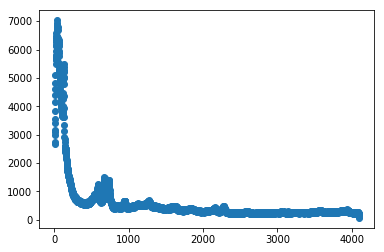

In [68]:
plt.scatter(chans, rates)

In [69]:
chans

[1.0,
 2.0,
 3.0,
 4.0,
 5.0,
 6.0,
 7.0,
 8.0,
 9.0,
 10.0,
 11.0,
 12.0,
 13.0,
 14.0,
 15.0,
 16.0,
 17.0,
 18.0,
 19.0,
 20.0,
 21.0,
 22.0,
 23.0,
 24.0,
 25.0,
 26.0,
 27.0,
 28.0,
 29.0,
 30.0,
 31.0,
 32.0,
 33.0,
 34.0,
 35.0,
 36.0,
 37.0,
 38.0,
 39.0,
 40.0,
 41.0,
 42.0,
 43.0,
 44.0,
 45.0,
 46.0,
 47.0,
 48.0,
 49.0,
 50.0,
 51.0,
 52.0,
 53.0,
 54.0,
 55.0,
 56.0,
 57.0,
 58.0,
 59.0,
 60.0,
 61.0,
 62.0,
 63.0,
 64.0,
 65.0,
 66.0,
 67.0,
 68.0,
 69.0,
 70.0,
 71.0,
 72.0,
 73.0,
 74.0,
 75.0,
 76.0,
 77.0,
 78.0,
 79.0,
 80.0,
 81.0,
 82.0,
 83.0,
 84.0,
 85.0,
 86.0,
 87.0,
 88.0,
 89.0,
 90.0,
 91.0,
 92.0,
 93.0,
 94.0,
 95.0,
 96.0,
 97.0,
 98.0,
 99.0,
 100.0,
 101.0,
 102.0,
 103.0,
 104.0,
 105.0,
 106.0,
 107.0,
 108.0,
 109.0,
 110.0,
 111.0,
 112.0,
 113.0,
 114.0,
 115.0,
 116.0,
 117.0,
 118.0,
 119.0,
 120.0,
 121.0,
 122.0,
 123.0,
 124.0,
 125.0,
 126.0,
 127.0,
 128.0,
 129.0,
 130.0,
 131.0,
 132.0,
 133.0,
 134.0,
 135.0,
 136.0,
 137.0,
 138.0,
 139